<code>plot_S2S_model_bias.ipynb</code>.  This notebook plots bias (model - obs) in sea ice extent for each S2S model as a function of forecast month and region. 

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from S2S_sea_ice_plotting import S2S_bias_plot

## Overview

Plot SIE model bias as a function of forecast valid month and model for each region.  Select a period of lead times to average over and an observational data set to compare the S2 models to. 

In [2]:
obs_name = 'NSIDC_0051'
COMMON_RF = True # we want to compare the reforecasts to obs over the same 15 year period
MAX_LEAD = 28 #max lead in days
MIN_LEAD = 14

In [3]:
if COMMON_RF == True:
    time_str = 'COMMON_RF'
fname_load = '../../data/RAW_ERRORS_all_S2S_models_OBS_{obs_name}_{time_str}.csv'.format(obs_name=obs_name,time_str=time_str)
SIE_err = pd.read_csv(fname_load)

Replace model names so they are all caps, and trim to lead days less than or equal to <code>MAX_LEAD</code>

In [4]:
SIE_err['model name'] = SIE_err['model name'].replace({'ecmwf':'ECMWF','ukmo':'UKMO','metreofr':'METEOFR',
                                                          'ncep':'NCEP'})
SIE_err_lead = SIE_err[pd.to_timedelta(SIE_err['lead time (days)']).isin([pd.Timedelta(i,'D') for i in range(MIN_LEAD,MAX_LEAD+1)])]

In [5]:
SIE_err['lead time (days)']
[pd.Timedelta(i,'D') for i in np.arange(MIN_LEAD,MAX_LEAD+1)]
np.arange(MIN_LEAD,MAX_LEAD+1)

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [6]:
SIE_err_lead_reg = SIE_err_lead.set_index('region')
SIE_err_lead_reg.index.unique()

Index(['Atlantic', 'Baffin Bay', 'Barents Sea', 'Barents-Kara-Laptev Sea',
       'Beaufort Sea', 'Bering', 'Canadian Islands', 'Central Arctic',
       'Chukchi Sea', 'East Greenland Sea', 'East Siberian Sea',
       'East Siberian-Beaufort-Chukchi Sea',
       'East Siberian-Beaufort-Chukchi-Laptev Sea', 'Hudson Bay', 'Kara Sea',
       'Kara-Laptev Sea', 'Laptev Sea', 'Sea of Okhotsk', 'St John',
       'panArctic'],
      dtype='object', name='region')

Select regions of interest for paper

In [7]:
reg_sel_all = ['panArctic','Central Arctic','East Siberian-Beaufort-Chukchi Sea','Kara-Laptev Sea','Barents Sea',
               'East Greenland Sea','Bering']

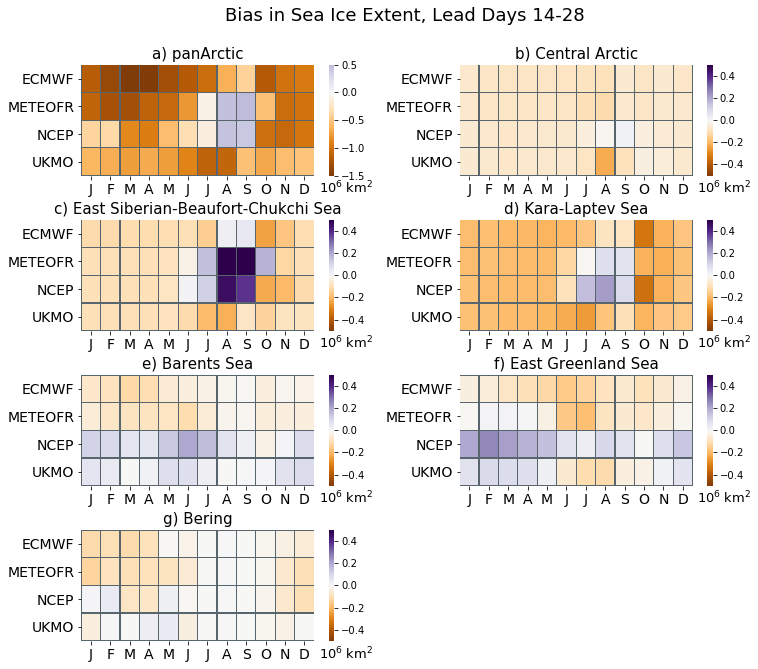

In [8]:
no_rows = 4
no_cols = 2
TO_PLOT = 'SIE'
TO_PLOT_str = 'SIE'
fig1,ax = plt.subplots(no_rows,no_cols,figsize=(12,10))#,sharex=True,sharey=True)
for imod in np.arange(0,len(reg_sel_all)):
    region_sel = reg_sel_all[imod]
    #region_sel = 'panArctic'
    plt_test = SIE_err_lead_reg.loc[region_sel]
    #
    ax_sel = ax.flat[imod]
    #cbar_ax = fig.add_axes([.965,.3,.03,.4])
    if (TO_PLOT == 'SIE pct') | (TO_PLOT == 'SIE clim pct'):
        if region_sel == 'panArctic':
            [vmin,vmax] = [-15,5]
        elif region_sel == 'Barents Sea':
            [vmin,vmax] = [-40,40]
        else:
            [vmin,vmax] = [-25,25]
    elif (TO_PLOT == 'SIE') | (TO_PLOT == 'SIE clim'):
        if region_sel == 'panArctic':
            [vmin,vmax] = [-1.5,0.5]
        #
        else:
            [vmin,vmax] = [-0.5,0.5] 
    else:
        [vmin,vmax] = [-0.25,0.25]
    ###
    S2S_bias_plot(plt_test,TO_PLOT,vmin,vmax,ax_sel,imod,region_sel)
    #
    fig1.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
    if (TO_PLOT == 'SIE') | (TO_PLOT == 'SIE pct'):
        fig1.suptitle('Bias in Sea Ice Extent, Lead Days {min_lead}-{max_lead}'.format(min_lead=MIN_LEAD,max_lead=MAX_LEAD),fontsize=18)
    elif (TO_PLOT == 'SIE clim') | (TO_PLOT == 'SIE clim pct'):
        fig1.suptitle('Bias in Climatological Sea Ice Extent, Lead Days {min_lead}-{max_lead}'.format(min_lead=MIN_LEAD,max_lead=MAX_LEAD),fontsize=18)
    elif (TO_PLOT == 'SIE anom') | (TO_PLOT == 'SIE anom pct'):
        fig1.suptitle('Bias in Anomalous Sea Ice Extent, Lead Days {min_lead}-{max_lead}'.format(min_lead=MIN_LEAD,max_lead=MAX_LEAD),fontsize=18)

fig1.delaxes(ax=ax.flat[7])

Save

In [9]:
fname_save = '../../figures/Bias_v_month_{TO_PLOT_str}_{MIN_LEAD}-{MAX_LEAD}_LEAD_DAYS_OBS_{obs_name}.pdf'.format(TO_PLOT_str=TO_PLOT_str,
                                                                            MIN_LEAD=MIN_LEAD,MAX_LEAD=MAX_LEAD,obs_name=obs_name)
fig1.savefig(fname_save,format='pdf',bbox_inches='tight')

In [10]:
fname_save

'../../figures/Bias_v_month_SIE_14-28_LEAD_DAYS_OBS_NSIDC_0051.pdf'